# Dividir el dataset en conjunto de entrenamiento y de testing

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("../datasets/ads/Advertising.csv")

(array([ 2.,  6., 15., 40., 54., 39., 26., 13.,  3.,  2.]),
 array([-2.83695073, -2.23726319, -1.63757564, -1.03788809, -0.43820054,
         0.16148701,  0.76117455,  1.3608621 ,  1.96054965,  2.5602372 ,
         3.15992475]),
 <a list of 10 Patch objects>)

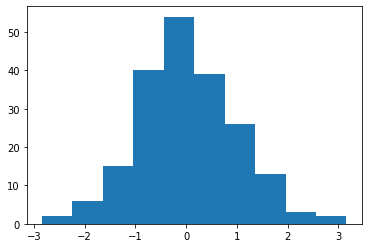

In [6]:
a = np.random.randn(len(data))
plt.hist(a)

In [8]:
check = (a < 0.8)
training = data[check]
testing = data[~check]

In [9]:
import statsmodels.formula.api as smf

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
lm = smf.ols(formula="Sales~TV+Radio", data=training).fit()

In [11]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     711.3
Date:                Tue, 17 Mar 2020   Prob (F-statistic):           1.96e-79
Time:                        17:30:45   Log-Likelihood:                -310.84
No. Observations:                 160   AIC:                             627.7
Df Residuals:                     157   BIC:                             636.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0127      0.329      9.169      0.000       2.364       3.662
TV             0.0446      0.002     28.214      0.000       0.041       0.048
Radio          0.1946      0.009     21.896      0.000       0.177       0.212
==============================================================================
Omnibus:                       66.052   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.210
Skew:                          -1.598   Prob(JB):                     7.57e-50
Kurtosis:                       7.869   Cond. No.                         427.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Validacion del modelo con el conjunto de testing

In [12]:
sales_pred = lm.predict(testing)

In [14]:
SSD = sum((testing["Sales"] - sales_pred)**2)
SSD

105.56308245999494

In [15]:
RSE = np.sqrt(SSD / (len(testing) -2 - 1))
RSE

1.6890992518802932

In [16]:
sales_mean = np.mean(testing["Sales"])
error = RSE / sales_mean
error

0.13116670564009264